In [19]:
import numpy as np
import pandas as pd

In [99]:
iris = pd.read_csv('iris-data.csv')

In [100]:
iris.sample(5)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
112,6.8,3.0,5.5,2.1,Iris-virginica
99,5.7,2.8,4.1,1.3,versicolor
31,5.4,3.4,1.5,0.4,Iris-setosa
45,4.8,3.0,1.4,0.3,Iris-setosa
123,6.3,2.7,4.9,1.8,Iris-virginica


In [101]:
iris.columns

Index(['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm',
       'petal_width_cm', 'class'],
      dtype='object')

In [102]:
iris['class'].unique()

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

In [103]:
iris['class'].value_counts() #versicolor and Iris-setossa have typos, let's fix them.

Iris-virginica     50
Iris-setosa        49
Iris-versicolor    45
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

In [104]:
iris['class'].replace({'versicolor': 'Iris-versicolor', 'Iris-setossa': 'Iris-setosa'}, inplace = True)

In [105]:
iris['class'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: class, dtype: int64

In [106]:
iris.sample(5)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
18,5.7,3.8,1.7,0.3,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa
118,7.7,2.6,6.9,2.3,Iris-virginica
48,5.3,3.7,1.5,0.2,Iris-setosa
141,6.9,3.1,5.1,2.3,Iris-virginica


In [107]:
iris.dtypes #Numerical values are object, so let's change them to numerical.

sepal_length_cm    float64
sepal_width_cm     float64
petal_length_cm    float64
petal_width_cm     float64
class               object
dtype: object

In [108]:
iris[['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm',
       'petal_width_cm']].astype(float)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,2.3
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [109]:
iris.dtypes

sepal_length_cm    float64
sepal_width_cm     float64
petal_length_cm    float64
petal_width_cm     float64
class               object
dtype: object

In [110]:
iris.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c0caf60>]],
      dtype=object)

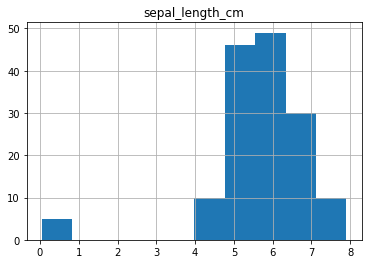

In [111]:
iris.hist('sepal_length_cm') #several outlier which corresponds to the minimum value in the describe. Below we follow a method to deal with them.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c0ea940>]],
      dtype=object)

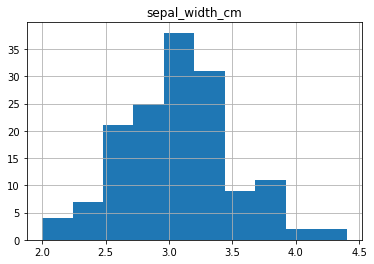

In [112]:
iris.hist('sepal_width_cm')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c1dee10>]],
      dtype=object)

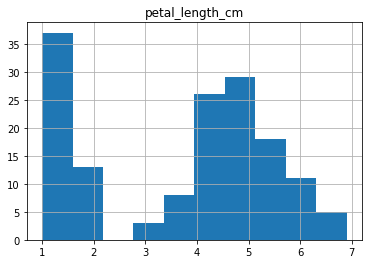

In [113]:
iris.hist('petal_length_cm')

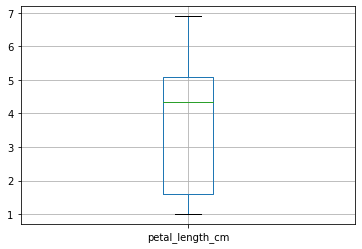

In [114]:
iris.boxplot('petal_length_cm') #No outliers

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c2c2d30>]],
      dtype=object)

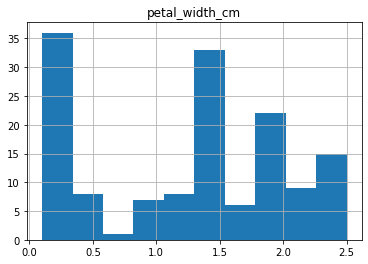

In [115]:
iris.hist('petal_width_cm')

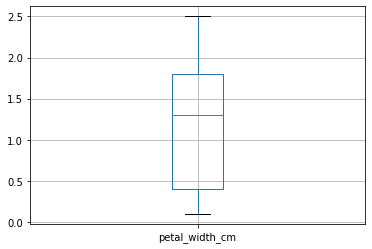

In [116]:
iris.boxplot('petal_width_cm')

In [117]:
iris.isnull().sum() #We find that there are 5 null values, the best thing is to interpolate them

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

In [128]:
iris_fixed = iris.interpolate(inplace = False)

In [129]:
iris_fixed

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     0
class              0
dtype: int64

In [131]:
iris_fixed.query('sepal_length_cm < 3') #We know all the values are between 5 and 6 so I assume there has been a typo in the entry of data.

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


In [138]:
iris_fixed['sepal_length_cm'] = iris_fixed['sepal_length_cm'].apply(lambda x: 100*x if x <3 else x)

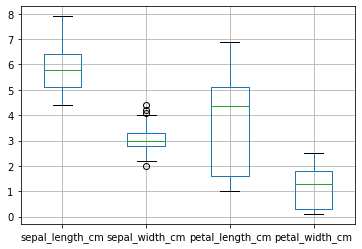

In [140]:
iris_fixed.boxplot() #sepal_width_cm seems to have some more outliers.

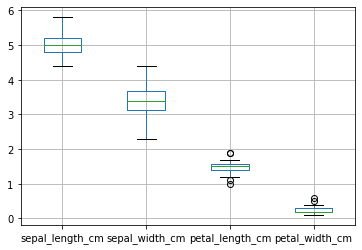

In [150]:
iris_fixed[iris_fixed['class']=='Iris-setosa'].boxplot()

In [151]:
iris_fixed[iris_fixed['class']=='Iris-setosa'].describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,50.000000,50.000000,50.000000,50.000000
mean,5.034000,3.418000,1.464000,0.246000
std,0.350865,0.381024,0.173511,0.106456
min,4.400000,2.300000,1.000000,0.100000
25%,4.800000,3.125000,1.400000,0.200000
50%,5.000000,3.400000,1.500000,0.200000
75%,5.200000,3.675000,1.575000,0.300000
max,5.800000,4.400000,1.900000,0.600000


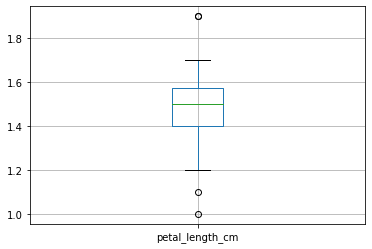

In [149]:
iris_fixed[iris_fixed['class']=='Iris-setosa'].boxplot('petal_length_cm')

In [152]:
iris_fixed.to_csv('cleaned_iris.csv')